In [1]:
!nvidia-smi

Mon Jun 29 13:18:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 450.36.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce 920MX       On   | 00000000:01:00.0 Off |                  N/A |
| N/A   62C    P0    N/A /  N/A |    124MiB /  2004MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip chest-xray-pneumonia.zip

In [5]:
!rm -r chest_xray/chest_xray/ -f
!rm -r chest_xray/__MACOSX/ -f

# Convolutional Neural Network to detect Pneumonia


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

## Data Analysis and Preprocessing

Getting all images in the dataset

In [3]:
path_train = "./Datasets/ChestXray/train"
path_val = "./Datasets/ChestXray/val"
path_test = "./Datasets/ChestXray/test"

Let's plot some random images
-----------------------------


Text(0.5, 1.0, 'person1158_virus_1942.jpeg')

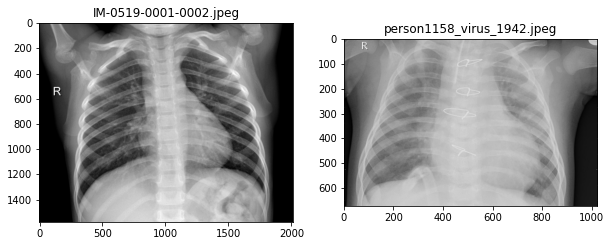

In [7]:
import os
from PIL import Image

print("Let's plot some random images")
print("-----------------------------")

images = os.listdir(path_train+'/NORMAL')
name1 = images[np.random.randint(0,len(images))]
path1 = path_train + "/NORMAL/" + name1

images = os.listdir(path_train+'/PNEUMONIA')
name2 = images[np.random.randint(0,len(images))]
path2 = path_train + "/PNEUMONIA/" + name2

plt.figure(figsize= (10,6))

plt.subplot(121)
plt.imshow(Image.open(path1), cmap='gray')
plt.title(name1)

plt.subplot(122)
plt.imshow(Image.open(path2), cmap='gray')
plt.title(name2)

### Transforming the images
* We're changing the sizes of the images to 226 x 226 and we'll flip the images horizontally as well so that we can have more data(images) to train on.

In [8]:
#Data preprocessing and analysis
classes = ["NORMAL", "PNEUMONIA"]
data_gen = keras.preprocessing.image.ImageDataGenerator() #Augmentation happens here
#But in this example we're not going to give the ImageDataGenerator method any parameters to augment our data.

In [9]:
train_batches = data_gen.flow_from_directory(path_train, target_size = (226, 226), classes = classes, class_mode = "categorical")
val_batches = data_gen.flow_from_directory(path_val, target_size = (226, 226), classes = classes, class_mode = "categorical")
test_batches = data_gen.flow_from_directory(path_test, target_size = (226, 226), classes = classes, class_mode = "categorical")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
train_batches.image_shape

(226, 226, 3)

## The Artificial Neural Network

### Model 1
Source to model is [here.](https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3)

In [11]:
#This is a Convolutional Artificial Neural Network
#VGG16 Model
model = keras.models.Sequential()
model.add(keras.layers.ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.ZeroPadding2D((1,1)))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='softmax'))

In [12]:
#Viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 226, 226, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 228, 228, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 226, 226, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 128)     7

In [11]:
optimizer = keras.optimizers.Adam(lr = 0.0001)
early_stopping_monitor = keras.callbacks.EarlyStopping(patience = 3, monitor = "val_accuracy", mode="max")
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
history = model.fit(train_batches, epochs=5, callbacks=[early_stopping_monitor], shuffle=True, validation_data=val_batches )
prediction = model.predict(train_batches)
score = model.evaluate(test_batches)

Epoch 1/5
163/163 [==============================] - 103s 634ms/step - loss: 0.3787 - accuracy: 0.8390 - val_loss: 0.8799 - val_accuracy: 0.6875
Epoch 2/5
163/163 [==============================] - 91s 557ms/step - loss: 0.1304 - accuracy: 0.9519 - val_loss: 0.8949 - val_accuracy: 0.6250
Epoch 3/5
163/163 [==============================] - 91s 557ms/step - loss: 0.1121 - accuracy: 0.9563 - val_loss: 0.2163 - val_accuracy: 0.9375
Epoch 4/5
163/163 [==============================] - 91s 556ms/step - loss: 0.0745 - accuracy: 0.9734 - val_loss: 0.2014 - val_accuracy: 0.9375
Epoch 5/5
20/20 [==============================] - 6s 318ms/step


In [12]:
score = model.evaluate(test_batches)

20/20 [==============================] - 7s 326ms/step


In [13]:
score

[0.5192623138427734, 0.7403846383094788]

Model 2

In [14]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters = 64, kernel_size = 7, input_shape=train_batches.image_shape),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Lambda(tf.nn.local_response_normalization),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Lambda(tf.nn.local_response_normalization),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = keras.callbacks.EarlyStopping(patience = 5)
history = model.fit(train_batches, callbacks=[early_stopping_monitor], validation_data = val_batches,epochs= 30)

Epoch 1/30
163/163 [==============================] - 72s 442ms/step - loss: 0.5836 - accuracy: 0.7642 - val_loss: 1.7462 - val_accuracy: 0.6250
Epoch 2/30
163/163 [==============================] - 67s 408ms/step - loss: 0.3526 - accuracy: 0.8399 - val_loss: 0.7667 - val_accuracy: 0.6875
Epoch 3/30
163/163 [==============================] - 67s 411ms/step - loss: 0.3202 - accuracy: 0.8668 - val_loss: 0.6035 - val_accuracy: 0.6250
Epoch 4/30
163/163 [==============================] - 67s 410ms/step - loss: 0.3010 - accuracy: 0.8857 - val_loss: 0.4174 - val_accuracy: 0.8125
Epoch 5/30
163/163 [==============================] - 67s 411ms/step - loss: 0.2412 - accuracy: 0.9114 - val_loss: 0.4906 - val_accuracy: 0.8125
Epoch 6/30
163/163 [==============================] - 67s 411ms/step - loss: 0.1699 - accuracy: 0.9385 - val_loss: 0.3702 - val_accuracy: 0.7500
Epoch 7/30
163/163 [==============================] - 67s 410ms/step - loss: 0.1457 - accuracy: 0.9498 - val_loss: 1.0479 - val_ac

In [15]:
score = model.evaluate(test_batches)

20/20 [==============================] - 6s 310ms/step


In [16]:
score

[3.0576765537261963, 0.745192289352417]

Model 3

A Inception model for testing

In [23]:
input_ = keras.layers.Input(shape = train_batches.image_shape)

path1_1 = keras.layers.Conv2D(32, kernel_size = (1,1), strides=1, padding = 'SAME')(input_)
path2_1 = keras.layers.Conv2D(32, kernel_size = (1,1), strides=1, padding = 'SAME')(input_)
path3_1 = keras.layers.MaxPooling2D((3,3), strides = 1, padding='SAME')(input_)

path1_2 = keras.layers.Conv2D(32, kernel_size = (3,3), strides=1, padding = 'SAME')(path1_1)
path2_2 = keras.layers.Conv2D(32, kernel_size = (5,5), strides=1, padding = 'SAME')(path2_1)
path3_2 = keras.layers.Conv2D(32, kernel_size = (5,6), strides=1, padding = 'SAME')(path3_1)

path4 = keras.layers.Conv2D(32, kernel_size = 1, strides=1, padding = 'SAME')(input_)

concat = keras.layers.concatenate([path1_2, path2_2, path2_2, path4], axis = 3)
flat = keras.layers.Flatten()(concat)
output = keras.layers.Dense(2, activation='softmax')(flat)

model = keras.models.Model(inputs = [input_], outputs = [output])

In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 226, 226, 3)  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 226, 226, 32) 128         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 226, 226, 32) 128         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 226, 226, 32) 9248        conv2d_25[0][0]                  
____________________________________________________________________________________________

In [31]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = keras.callbacks.EarlyStopping(patience = 1)
history = model.fit(train_batches, callbacks=[early_stopping_monitor],validation_data = val_batches ,epochs= 10)

Epoch 1/10
163/163 [==============================] - 59s 360ms/step - loss: 3438.7762 - accuracy: 0.9287 - val_loss: 8553.5693 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 58s 359ms/step - loss: 456.2916 - accuracy: 0.9718 - val_loss: 1082.7386 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 58s 357ms/step - loss: 192.1298 - accuracy: 0.9831 - val_loss: 277.8126 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 58s 354ms/step - loss: 184.7515 - accuracy: 0.9827 - val_loss: 5269.3057 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 58s 353ms/step - loss: 321.6215 - accuracy: 0.9799 - val_loss: 3364.2188 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 58s 353ms/step - loss: 239.2707 - accuracy: 0.9831 - val_loss: 3596.4302 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 58s 353ms/step - loss: 46.5851 - accuracy: 0.9

In [32]:
train_batches.image_shape

(226, 226, 3)

In [33]:
score = model.evaluate(test_batches)

20/20 [==============================] - 6s 280ms/step


In [34]:
score

[17760.65625, 0.7291666865348816]